In [120]:
from pyprojroot import here
import pandas as pd
from pathlib import Path
import json
import numpy as np

from pprint import pprint

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
# up figure resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [3]:
folder = here() / 'data/raw/fast-teams-twitter-data/01-etatyo/'
example_path = folder / "1237122416809295872.json"

with open (example_path, 'r') as f:
    file = json.load(f)

pprint(file.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


## Inspector

In [6]:
data = pd.DataFrame()

pathlist = Path(folder).glob('*.json')
files = [x.name for x in pathlist]

drop = widgets.Dropdown(
            options=files,
            description='files',
            disabled=False,
    )
display(drop)

Dropdown(description='files', options=('1240556017949257728.json', '1240281984355774464.json', '12398153297879…

## Combine

In [7]:
# combine multiple json into one list
tweets = list()
pathlist = Path(folder).glob('*.json')

for path in pathlist:
    print(path, end='\r')
    with open(path, 'r') as f:
        file = json.load(f)
        tweets.append(file)

## Hashtag stats

In [70]:
# extranct hashtags
hashtags = [x['entities']['hashtags'] for x in tweets]
hashtags = [x for x in hashtags if x != []]

#https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
flat_list = [item for sublist in hashtags for item in sublist]

hashtags = [x['text'] for x in flat_list]

hashtags = pd.Series(hashtags)

hashtags = hashtags.value_counts().sort_values(ascending=False)

hashtags.head(20).plot.barh(color='k');
plt.savefig(here() / 'results/figures/2020-03-21-hashtag-most-used-20-freqs.png', transparent=True, bbox_inches='tight', dpi=600)

## Word clouds

In [86]:
len(tweets)

5687

In [79]:
tweets[2500]['text']

'RT @LiinaAulin: Etätyöpäivän dramaattinen päätös: jäin jumiin Madagaskarin saarelle ilman rahaa paluulippuun 😱 Varsinainen karenteeni #afri…'

In [84]:
truncs = [x['truncated'] for x in tweets]

In [88]:
texts = list()
for x in tweets:
    try:
        texts.append(x['text'])
    except KeyError:
        continue

In [104]:
text = " ".join(texts)

In [105]:
from wordcloud import WordCloud

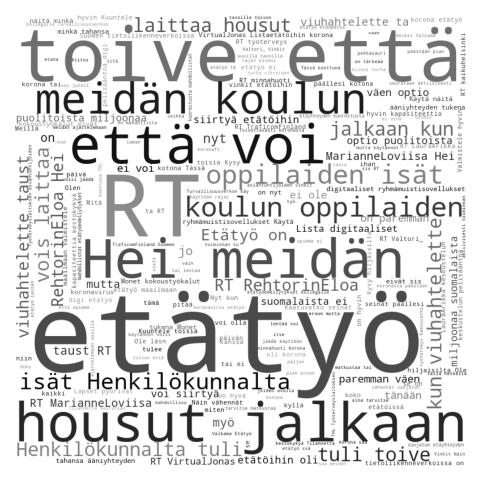

In [142]:
import random

wordcloud = WordCloud(width=800, 
                      height=800, 
                      stopwords=['https', 'CO' 'RT', 'ja', 'co'],
                      background_color='white',
                      margin=1).generate(text)

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(0, 60)

plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
plt.axis("off")
plt.savefig(here() / 'results/figures/2020-03-21-wordcloud.png', dpi=300, bbox_inches='tight', transparent=True)